<a href="https://colab.research.google.com/github/tcotte/CNN_Pytorch/blob/master/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optimizers

In [1]:
!git clone https://github.com/tcotte/CNN_Pytorch
%cd CNN_Pytorch

Cloning into 'CNN_Pytorch'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 3109 (delta 3), reused 12 (delta 2), pack-reused 3092
Receiving objects: 100% (3109/3109), 97.61 MiB | 36.64 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Checking out files: 100% (3318/3318), done.
/content/CNN_Pytorch


In [4]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

if cuda:
    torch.cuda.manual_seed(SEED)

We are going to use the alex architecture and try different optimizers on this notebook.

In [2]:
from torchvision import transforms

AlexTransform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

### Load Dataset

In [9]:
import os
import torchvision

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

batch_size=256
dataset_dir = os.path.join(os.path.expanduser("~"), 'Datasets', 'FashionMNIST')

# Load the dataset for alexnet arch
train_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= AlexTransform,
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= AlexTransform,
                                           download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

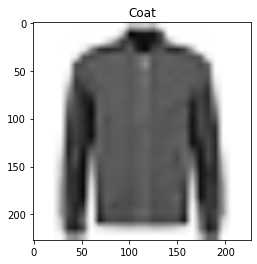

In [10]:
from functions.plot_picture import matplotlib_imshow

# get some random training images
dataiter = iter(train_loader)

images, labels = dataiter.next()

# # creat grid of images
img_grid = torchvision.utils.make_grid(images[0])

# # show images & labels
matplotlib_imshow(img_grid, class_names[labels[0]])

In [24]:
from functions.training import train_model, evaluate_model
from models.alexnet_arch import AlexNet
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_an = []
accuracies_an = []
nb_batch = int(np.ceil(len(train_loader.dataset)/batch_size))

alexnet_model = AlexNet()

optimizers = {"SGD": optim.SGD(alexnet_model.parameters(),  lr=0.001),
             "AdamW": optim.AdamW(alexnet_model.parameters(),  lr=0.001),
             "Adagrad": optim.Adagrad(alexnet_model.parameters(),  lr=0.001),
             "Adam": optim.Adam(alexnet_model.parameters(),  lr=0.001)
}

alexnet_model.to(device)
for opt in optimizers:
  print("<================ "+opt+" ================>")
  for epoch in range(EPOCHS):
    losses_an.extend(train_model(train_loader, device, alexnet_model, optimizers[opt], epoch,  EPOCHS, batch_size)[-nb_batch:])
    accuracies_an.append(evaluate_model(alexnet_model, device, test_loader, losses_an[-1], EPOCHS, epoch, batch_size, len(train_loader.dataset)))

<================ SGD ================>
 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 2.302470	 Test Accuracy: 13.0000%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 2.300724	 Test Accuracy: 15.5100%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 2.298950	 Test Accuracy: 18.8000%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 2.293018	 Test Accuracy: 23.2500%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 2.287746	 Test Accuracy: 26.3800%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 2.247393	 Test Accuracy: 21.8100%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 1.157704	 Test Accuracy: 51.1400%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 1.104713	 Test Accuracy: 59.8600%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.834160	 Test Accuracy: 62.4400%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.997662	 Test Accuracy: 63.2100%
<================ AdamW ================>
 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 2.301218	 Test Accuracy: 10.3900%
 Train Epoch: 2/10 [60000/60000 (100%

RuntimeError: ignored

In [28]:
device

device(type='cuda')

In [36]:
rest_optimizers = {
             "Adam": optim.Adam(alexnet_model.parameters(),  lr=0.001)
             }

for opt in rest_optimizers:
  print("<================ "+opt+" ================>")
  for epoch in range(EPOCHS):
    losses_an.extend(train_model(train_loader, device, alexnet_model, optimizers[opt], epoch,  EPOCHS, batch_size)[-nb_batch:])
    accuracies_an.append(evaluate_model(alexnet_model, device, test_loader, losses_an[-1], EPOCHS, epoch, batch_size, len(train_loader.dataset)))

<================ Adam ================>
 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.348169	 Test Accuracy: 81.9300%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.342953	 Test Accuracy: 84.0000%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.332419	 Test Accuracy: 86.8200%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.226865	 Test Accuracy: 87.4300%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.474910	 Test Accuracy: 88.3700%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.288944	 Test Accuracy: 88.8400%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.398103	 Test Accuracy: 87.9800%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.253041	 Test Accuracy: 88.2300%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.236024	 Test Accuracy: 88.7900%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.267509	 Test Accuracy: 89.4600%


### Register in csv file

In [37]:
def filter_losses(losses, EPOCHS):
  losses_filtered = []
  for i in range(EPOCHS):
    if i==0:
      losses_filtered.append(losses[nb_batch-1])
    else:
      losses_filtered.append(losses[nb_batch-1+nb_batch*i])
  return losses_filtered

In [43]:
import pandas as pd 

d = {('SGD', 'accuracy'): accuracies_an[:10],
     ('SGD', 'loss'): filter_losses(losses_an[:2350], EPOCHS),
     ('AdamW','accuracy'): accuracies_an[10:20],
     ('AdamW','loss'): filter_losses(losses_an[2350:2350*2], EPOCHS),
     ('Adam','accuracy'): accuracies_an[20:],
     ('Adam','loss'): filter_losses(losses_an[2350*2:], EPOCHS),
}
l=[('SGD', 'accuracy'),  ('SGD', 'loss'), ('AdamW','accuracy'),  ('AdamW','loss'), ('Adam','accuracy'),  ('Adam','loss')]
df = pd.DataFrame(data=d, columns = l)

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['',''])
df

SGD              AdamW               Adam          
  accuracy      loss accuracy      loss accuracy      loss
0   0.1300  2.302470   0.1039  2.301218   0.8193  0.348169
1   0.1551  2.300724   0.1020  2.302879   0.8400  0.342953
2   0.1880  2.298950   0.0995  2.301322   0.8682  0.332419
3   0.2325  2.293018   0.0981  2.303951   0.8743  0.226865
4   0.2638  2.287746   0.0966  2.302387   0.8837  0.474910
5   0.2181  2.247393   0.1006  2.303426   0.8884  0.288944
6   0.5114  1.157704   0.0968  2.301320   0.8798  0.398103
7   0.5986  1.104713   0.0976  2.301078   0.8823  0.253041
8   0.6244  0.834160   0.1004  2.302269   0.8879  0.236024
9   0.6321  0.997662   0.1003  2.303796   0.8946  0.267509

In [46]:
df.to_csv('csv/different_optimizers.csv')

Text(0, 0.5, 'Train loss')

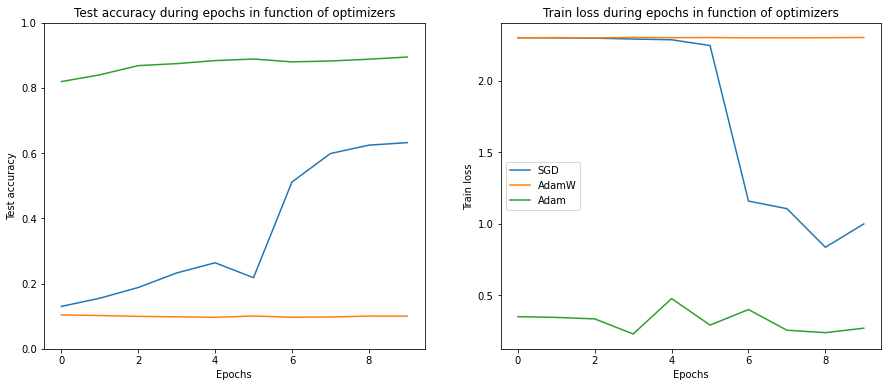

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,6))

ax1.plot(np.arange(EPOCHS), df[('SGD', 'accuracy')], label='SGD')
ax1.plot(np.arange(EPOCHS), df[('AdamW', 'accuracy')], label='AdamW')
ax1.plot(np.arange(EPOCHS), df[('Adam', 'accuracy')], label='Adam')
ax2.plot(np.arange(EPOCHS), df[('SGD', 'loss')], label='SGD')
ax2.plot(np.arange(EPOCHS), df[('AdamW', 'loss')], label='AdamW')
ax2.plot(np.arange(EPOCHS), df[('Adam', 'loss')], label='Adam')
ax1.set_ylim(0,1)
ax1.set_title("Test accuracy during epochs in function of optimizers")
ax2.set_title("Train loss during epochs in function of optimizers")
plt.legend(loc='center left')

for ax in [ax1, ax2]:
  ax.set_xlabel("Epochs")

ax1.set_ylabel("Test accuracy")
ax2.set_ylabel("Train loss")

In [45]:
optimizer = optim.AdamW(alexnet_model.parameters(),  lr=0.0001)

for epoch in range(EPOCHS):
  losses_an.extend(train_model(train_loader, device, alexnet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_an.append(evaluate_model(alexnet_model, device, test_loader, losses_an[-1], EPOCHS, epoch, batch_size, len(train_loader.dataset)))

 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 2.311103	 Test Accuracy: 9.2300%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 2.299285	 Test Accuracy: 9.9600%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 2.303412	 Test Accuracy: 9.8100%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 2.304818	 Test Accuracy: 9.6500%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 2.306070	 Test Accuracy: 10.1600%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 2.306047	 Test Accuracy: 10.4800%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 2.296131	 Test Accuracy: 9.8100%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 2.300194	 Test Accuracy: 9.8100%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 2.306978	 Test Accuracy: 10.2400%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 2.300343	 Test Accuracy: 10.3700%
